<a href="https://colab.research.google.com/github/davrodrod/algorirmosIA/blob/master/RegresionPolinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión polinómica con python

In [0]:
import numpy as np

# Fuente https://nbviewer.jupyter.org/github/cs109/content/blob/master/labs/lab5/Lab5.ipynb

np.random.seed(42)

Consider the model selection problem: what degree of polynomial you want to fit: d. It acts like a hyperparameter, in the sense that it is a second parameter that needs to be fit for. Once you set it, you still have to fit the parameters of your linear or polynomial or elsewise model.

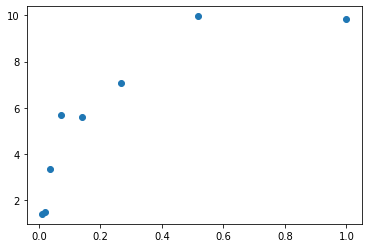

In [20]:
import matplotlib.pyplot as plt

# Generación de datos

def generate_curve(x, sigma):
    return np.random.normal(10 - 1. / (x + 0.1), sigma)
x = 10 ** np.linspace(-2, 0, 8)
intrinsic_error=1.
y=generate_curve(x, intrinsic_error)
plt.scatter(x,y)

Una situación "high bias" es una en la que se no se ajusta (underfit). 
Puede verse como para un bajo d (el grado del polinomio), el RMSE sigue siendo alto en el conjunto de train. 

Por el contrario, una situación de alta varianza (se incremente el grado del polinomio) es una en la que se sobreajusta (overfit), en este caso el ajuste al conjunto de train es muy bueno y el RMSE baja y tiende a 0

d=1, rmse= 1.7052494283182704
d=2, rmse= 0.892141392119931
d=4, rmse= 0.49655267601239217
d=6, rmse= 0.13298070060665568


(-1.0, 12.0)

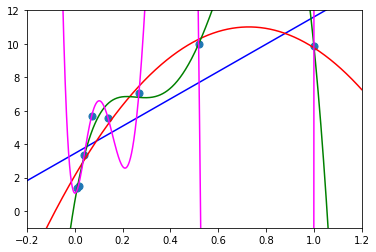

In [21]:
# Se generan 1000 valores para la x entre -0.2 y 1.2. Se le llama x_new
x_new=np.linspace(-0.2, 1.2, 1000)

#Cálculo del error con RMSE, el p es el modelo
def rmse(p,x,y):
    yfit = np.polyval(p, x)     # Estas son las predicciones de y
    return np.sqrt(np.mean((y - yfit) ** 2))

# Se pintan las muestras del código anterior
plt.scatter(x,y, s=50)

# Regresión lineal con polinómio de grado 1. Línea azul en la gráfica
f1=np.polyfit(x,y,1)   # Con esto se obtiene el modelo, los coeficientes para la fórmula
plt.plot(x_new,np.polyval(f1,x_new), color='blue')  # Ahora, se le pasan los 1000 valores al modelo para obtener su y correspondiente y pintarla
print("d=1, rmse=",rmse(f1,x,y))

# Regresión lineal con polinómio de grado 2. Línea roja en la gráfica
f2=np.polyfit(x,y,2)
plt.plot(x_new,np.polyval(f2,x_new), color='red')
print("d=2, rmse=",rmse(f2,x,y))

# Regresión lineal con polinómio de grado 4. Línea verde en la gráfica
f4=np.polyfit(x,y,4)
plt.plot(x_new,np.polyval(f4,x_new), color='green')
print("d=4, rmse=",rmse(f4,x,y))

# Regresión lineal con polinómio de grado 6. Línea magenta en la gráfica
f6=np.polyfit(x,y,6)
plt.plot(x_new,np.polyval(f6,x_new), color='magenta')
print("d=6, rmse=",rmse(f6,x,y))

plt.xlim(-0.2, 1.2)
plt.ylim(-1, 12)

Ahora se hace lo mismo con conjunto más grande de puntos y utilizando conjuntos de train y de test

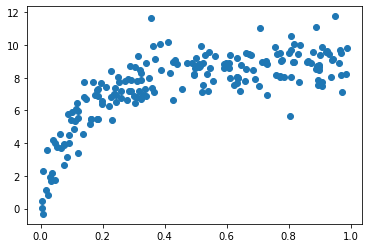

In [22]:
N = 200
x = np.random.random(N)
y = generate_curve(x, intrinsic_error)
plt.scatter(x,y)

Se divide entre conjunto de train (60%, en rojo) y de test(40%, en azul)

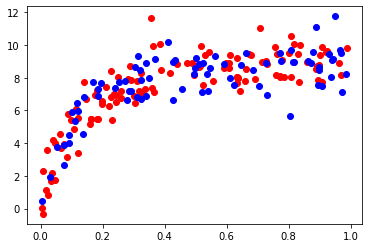

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.6)
plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly co

Text(0, 0.5, 'rms error')

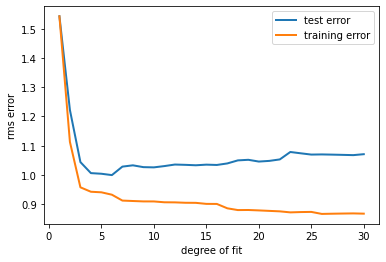

In [30]:
# Se generan los RMSE para modelos polinómicos con d grados de libertad. Con d entre 1 y 21

ds = np.arange(30)+1
train_err = np.zeros(len(ds))
test_err = np.zeros(len(ds))

for i, d in enumerate(ds):
    p = np.polyfit(xtrain, ytrain, d)

    train_err[i] = rmse(p, xtrain, ytrain)
    test_err[i] = rmse(p, xtest, ytest)

# Se pintan estos RMSE en el eje y frente al d (grado del polinomio) en el eje x para train y test

fig, ax = plt.subplots()

ax.plot(ds, test_err, lw=2, label = 'test error')
ax.plot(ds, train_err, lw=2, label = 'training error')
ax.legend(loc=0)
ax.set_xlabel('degree of fit')
ax.set_ylabel('rms error')

En la figura anterior, puede observarse que a medida que aumenta el d, se produce overfitting, el modelo se ajusta muy bien al train set pero el error en el test set empieza a crecer

Ahora se pinta la curva de aprendizaje (learning curve) que muestra el error a medida que aumenta el tamaño del conjunto de datos

In [0]:
#taken lock stock and barrel from Vanderplas.
def plot_learning_curve(d):
    sizes = np.linspace(2, N, 50).astype(int)
    train_err = np.zeros(sizes.shape)
    crossval_err = np.zeros(sizes.shape)

    for i, size in enumerate(sizes):
        # Train on only the first `size` points
        p = np.polyfit(xtrain[:size], ytrain[:size], d)
        
        # Validation error is on the *entire* validation set
        crossval_err[i] = rmse(p, xtest, ytest)
        
        # Training error is on only the points used for training
        train_err[i] = rmse(p, xtrain[:size], ytrain[:size])

    fig, ax = plt.subplots()
    ax.plot(sizes, crossval_err, lw=2, label='validation error')
    ax.plot(sizes, train_err, lw=2, label='training error')
    ax.plot([0, N], [intrinsic_error, intrinsic_error], '--k', label='intrinsic error')

    ax.set_xlabel('training set size')
    ax.set_ylabel('rms error')
    
    ax.legend(loc=0)
    
    ax.set_xlim(0, 99)

    ax.set_title('d = %i' % d)

(0.0, 10.0)

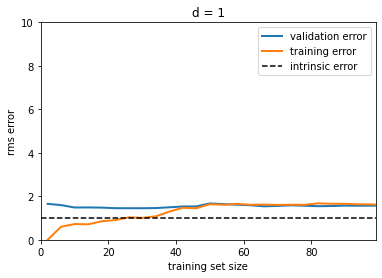

In [34]:
# Se pinta la curva para un d=1
plot_learning_curve(d=1)
plt.ylim(0, 10)

Se observa que hay underfitting, al aumentar el m sube el error en el trainig set y se iguala con el error en el del testing set. Se observa que el error está por encima de la línea de error intrínseco.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


(0.0, 5.0)

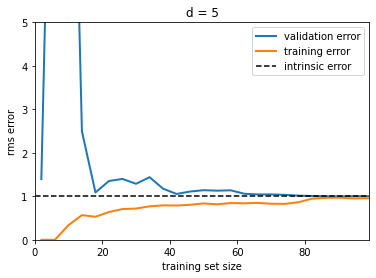

In [38]:
# Se pinta la curva para un d=5
plot_learning_curve(d=5)
plt.ylim(0, 5)